In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [21]:
df = pd.read_csv('data/data_main.csv', index_col=0).reset_index()

In [47]:
def datetime_to_unix(x):
    return (time.mktime(x.timetuple()))

def unix_to_datetime(x):
    return datetime.fromtimestamp(x)

In [82]:
# loop from min unix to max unix datetime in AT price day ahead in 1 hour timestemps
unix_min = datetime_to_unix(pd.to_datetime(df.loc[~df["AT_price_day_ahead"].isna(),"utc_timestamp"].min()))
unix_max = datetime_to_unix(pd.to_datetime(df.loc[~df["AT_price_day_ahead"].isna(),"utc_timestamp"].max()))
unix_range = np.arange(unix_min, unix_max, 3600)

# create new dataframe with unix timestamps as index
df_new = pd.DataFrame(unix_range)
df_new.columns = ['unix']
df_new["dt"] = df_new["unix"].apply(lambda x: unix_to_datetime(x))
df["utc_timestamp"] = pd.to_datetime(df["utc_timestamp"])
df_new["boolean"] = df_new["unix"].isin(df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].apply(lambda x: datetime_to_unix(x)))


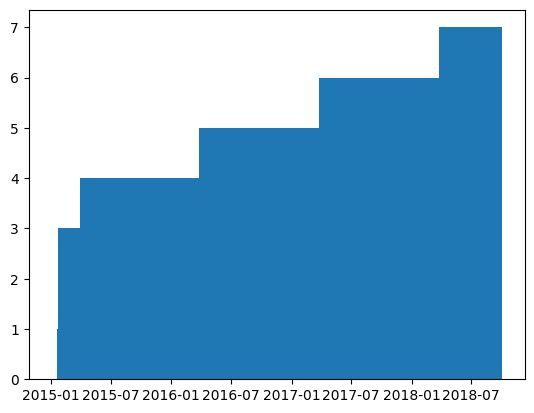

In [86]:
# plot dt and boolean in a cumulative histgram
plt.hist(df_new["dt"], weights=df_new["boolean"], cumulative=True, bins=1000)
plt.show()


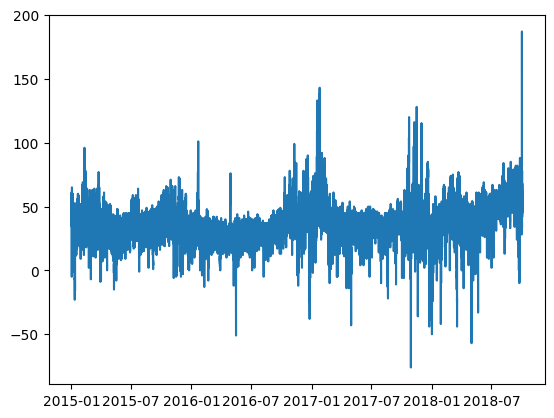

In [90]:
plt.plot(df["utc_timestamp"], df["AT_price_day_ahead"])

In [63]:
df_new["dt"]

0       2015-01-01 00:00:00
1       2015-01-01 01:00:00
2       2015-01-01 02:00:00
3       2015-01-01 03:00:00
4       2015-01-01 04:00:00
                ...        
32896   2018-10-02 17:00:00
32897   2018-10-02 18:00:00
32898   2018-10-02 19:00:00
32899   2018-10-02 20:00:00
32900   2018-10-02 21:00:00
Name: dt, Length: 32901, dtype: datetime64[ns]

In [49]:
df_new

,unix,dt,boolean
0,-3601.0,1969-12-31 23:59:59,False


In [40]:
datetime.strptime(df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].min())

TypeError: strptime() takes exactly 2 arguments (1 given)

In [34]:
datetime_to_unix(df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].min())

AttributeError: 'str' object has no attribute 'timetuple'

In [28]:
for _ in range(df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].min(), df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].max(), 3600):
    print(_)

TypeError: 'str' object cannot be interpreted as an integer

In [24]:
help_list = [_ for _ in range(df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].min(), df.loc[df["AT_price_day_ahead"].isna(),"utc_timestamp"].max(), 3600)]


TypeError: 'str' object cannot be interpreted as an integer